In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

In [2]:
# Prepare data

features_train, labels_train, features_test, labels_test = makeTerrainData(10000)


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

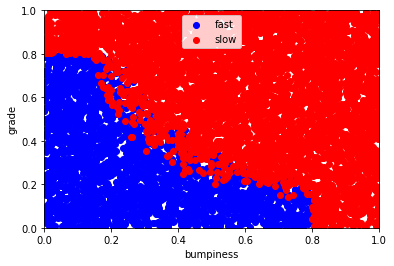

In [3]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


In [4]:
# Data Shape
(len(features_train), len(features_train[0]))

(7500, 2)

# KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# 调参
for k in [1, 2, 3, 4, 5, 6, 7, 8,9, 10, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, labels_train)
    score = knn.score(features_test, labels_test)
    print "n_neighbors: {:>10}. score: {:>10}".format(k, score)

n_neighbors:          1. score:     0.9464
n_neighbors:          2. score:      0.952
n_neighbors:          3. score:     0.9564
n_neighbors:          4. score:     0.9592
n_neighbors:          5. score:     0.9616
n_neighbors:          6. score:     0.9616
n_neighbors:          7. score:     0.9616
n_neighbors:          8. score:       0.96
n_neighbors:          9. score:     0.9652
n_neighbors:         10. score:     0.9616
n_neighbors:         15. score:      0.962


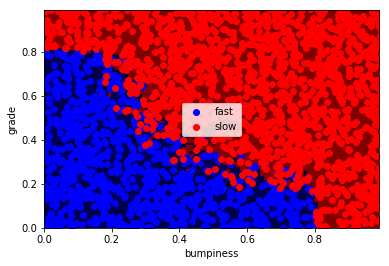

In [7]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(features_train, labels_train)
prettyPicture(knn, features_test, labels_test)

# Random Forests

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# 调参
for n_estimators in [10, 15, 20, 50, 70, 100, 200, 300, 500,1000, 2500]:
    rfc = RandomForestClassifier(n_estimators)
    rfc.fit(features_train, labels_train)
    score = rfc.score(features_test, labels_test)
    print "n_estimators: {:>10}. score: {:>10}".format(n_estimators, score)

n_estimators:         10. score:     0.9552
n_estimators:         15. score:      0.958
n_estimators:         20. score:     0.9576
n_estimators:         50. score:      0.958
n_estimators:         70. score:     0.9576
n_estimators:        100. score:     0.9572
n_estimators:        200. score:     0.9588
n_estimators:        300. score:      0.958
n_estimators:        500. score:     0.9592
n_estimators:       1000. score:     0.9584
n_estimators:       2500. score:     0.9592


rfc = RandomForestClassifier(100)
rfc.fit(features_train, labels_train)
prettyPicture(rfc, features_test, labels_test)

# AdaBoostClassifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier

In [11]:
# 调参
for n_estimators in [5, 10, 15, 20, 25, 50, 70, 100, 200, 300, 500, 1000]:
    abc = AdaBoostClassifier(n_estimators=n_estimators)
    abc.fit(features_train, labels_train)
    score = abc.score(features_test, labels_test)
    print "n_estimators: {:>10}. score: {:>10}".format(n_estimators, score)

n_estimators:          5. score:     0.9056
n_estimators:         10. score:       0.96
n_estimators:         15. score:       0.96
n_estimators:         20. score:     0.9604
n_estimators:         25. score:     0.9604
n_estimators:         50. score:     0.9608
n_estimators:         70. score:     0.9616
n_estimators:        100. score:     0.9628
n_estimators:        200. score:       0.96
n_estimators:        300. score:     0.9596
n_estimators:        500. score:     0.9596
n_estimators:       1000. score:     0.9592


In [12]:
# 调参
for n_estimators in [50, 70, 100, 200]:
    for learning_rate in np.linspace(0.1, 2, 20):
        abc = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        abc.fit(features_train, labels_train)
        score = abc.score(features_test, labels_test)
        print "n_estimators: {:>10}. learning_rate: {:>10}. score: {:>10}".format(n_estimators, learning_rate, score)

n_estimators:         50. learning_rate:        0.1. score:     0.9564
n_estimators:         50. learning_rate:        0.2. score:     0.9596
n_estimators:         50. learning_rate:        0.3. score:     0.9628
n_estimators:         50. learning_rate:        0.4. score:     0.9612
n_estimators:         50. learning_rate:        0.5. score:     0.9624
n_estimators:         50. learning_rate:        0.6. score:     0.9628
n_estimators:         50. learning_rate:        0.7. score:     0.9624
n_estimators:         50. learning_rate:        0.8. score:     0.9628
n_estimators:         50. learning_rate:        0.9. score:     0.9624
n_estimators:         50. learning_rate:        1.0. score:     0.9608
n_estimators:         50. learning_rate:        1.1. score:     0.9612
n_estimators:         50. learning_rate:        1.2. score:     0.9616
n_estimators:         50. learning_rate:        1.3. score:       0.96
n_estimators:         50. learning_rate:        1.4. score:     0.9612
n_esti

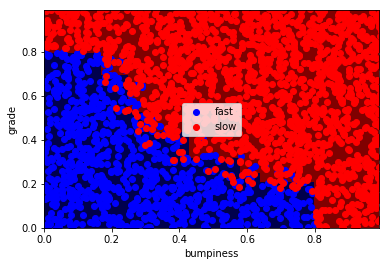

In [13]:
abc = AdaBoostClassifier(n_estimators=20)
abc.fit(features_train, labels_train)
prettyPicture(abc, features_test, labels_test)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
# 调参
for n_estimators in [5, 10, 15, 20, 25, 50, 70, 100, 200, 300, 500, 1000]:
    gbrf = GradientBoostingClassifier(n_estimators=n_estimators)
    gbrf.fit(features_train, labels_train)
    score = gbrf.score(features_test, labels_test)
    print "n_estimators: {:>10}. score: {:>10}".format(n_estimators, score)

n_estimators:          5. score:     0.9468
n_estimators:         10. score:     0.9528
n_estimators:         15. score:     0.9568
n_estimators:         20. score:     0.9588
n_estimators:         25. score:     0.9612
n_estimators:         50. score:     0.9648
n_estimators:         70. score:     0.9648
n_estimators:        100. score:     0.9656
n_estimators:        200. score:     0.9648
n_estimators:        300. score:      0.964
n_estimators:        500. score:      0.962
n_estimators:       1000. score:     0.9588


In [16]:
# 调参
for n_estimators in [25, 50, 70, 100, 200]:
    for learning_rate in np.linspace(0.1, 2, 20):
        gbrf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
        gbrf.fit(features_train, labels_train)
        score = gbrf.score(features_test, labels_test)
        print "n_estimators: {:>10}. learning_rate: {:>10}. score: {:>10}".format(n_estimators, learning_rate, score)

n_estimators:         25. learning_rate:        0.1. score:     0.9612
n_estimators:         25. learning_rate:        0.2. score:     0.9628
n_estimators:         25. learning_rate:        0.3. score:     0.9652
n_estimators:         25. learning_rate:        0.4. score:     0.9656
n_estimators:         25. learning_rate:        0.5. score:     0.9616
n_estimators:         25. learning_rate:        0.6. score:      0.964
n_estimators:         25. learning_rate:        0.7. score:     0.9628
n_estimators:         25. learning_rate:        0.8. score:     0.9628
n_estimators:         25. learning_rate:        0.9. score:     0.9624
n_estimators:         25. learning_rate:        1.0. score:     0.9616
n_estimators:         25. learning_rate:        1.1. score:     0.9596
n_estimators:         25. learning_rate:        1.2. score:     0.9544
n_estimators:         25. learning_rate:        1.3. score:     0.9568
n_estimators:         25. learning_rate:        1.4. score:     0.9604
n_esti